# Maximum Likelihood Estimators#

MLE is a parametric approach as it assumes a distribution for a given sample. I will skip the theory behind this approach but focus more on the practical aspects.

Let us generate random samples from a beta distribution and fit different distribution to this sample.

In [97]:
from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.stats import chisquare
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import division
from scipy.io import loadmat
%matplotlib inline

In [6]:
a = 5; b=2
rv = beta.rvs(a, b, size=100)

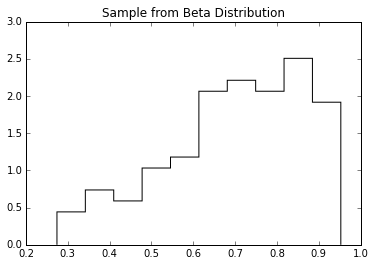

In [40]:
plt.hist(rv, histtype='step', normed=True, color='k' )
_=plt.title('Sample from Beta Distribution')

Now, let's fir normal and beta distributions to this sample.

In [35]:
nloc, nscale = norm.fit(rv)
a_est, b_est, betaloc, betascale = beta.fit(rv)

Plot the fitted distributions to check goodness of fit.

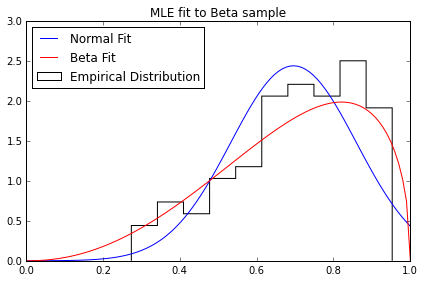

In [42]:
plt.hist(rv, histtype='step', normed=True,color = 'k', label='Empirical Distribution' )
plt.plot(np.linspace(0,1,len(rv)),norm(nloc, nscale).pdf(np.linspace(0,1,len(rv))), label='Normal Fit')
plt.plot(np.linspace(0,1,len(rv)),beta(a_est, b_est).pdf(np.linspace(0,1,len(rv))),color = 'r',label = 'Beta Fit')
plt.legend(loc='best'); plt.title('MLE fit to Beta sample')
plt.tight_layout()

As you can see, beta distribution fits better to our data as expected. Now, let's look at CDFs:

In [48]:
x = np.linspace(rv.min(),rv.max(),len(rv))
cdf_norm = norm(loc=nloc, scale = nscale).cdf(x)
cdf_beta = beta(a=a_est, b = b_est).cdf(x)
num_bins = len(x)
counts, bin_edges = np.histogram(rv, bins=num_bins)
cdf_emprical = np.cumsum(counts)/sum(counts)

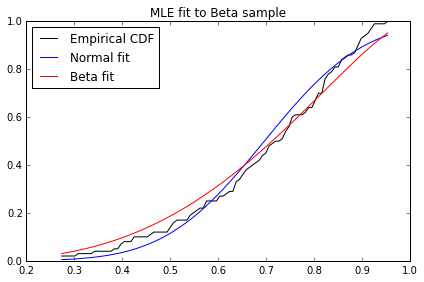

In [49]:
plt.plot(x, cdf_emprical, label='Empirical CDF',color='k' )
plt.plot(x, cdf_norm, label='Normal fit ',color='b' )
plt.plot(x, cdf_beta, label='Beta fit ',color='r' )
plt.legend(loc='best'); plt.title('MLE fit to Beta sample')
plt.tight_layout()

Beta CDF fits better to the empirical cdf especially for larger values. This can also be observed in the plot of pdfs. Normal distribution performs slightly better for lower values.

**Analyze Body Measurements**

Now, let's analyze real data set.

In [60]:
body_women = loadmat('body_women.mat')['body_women']
body_men = loadmat('body_men.mat')['body_men']

In [63]:
body_women = pd.DataFrame(body_women, columns=['weight', 'height', 'waist_girth', 'abdomen_girth'])

In [64]:
body_women.head()

,weight,height,waist_girth,abdomen_girth
0,51.6,161.2,66.5,79.0
1,59.0,167.5,61.5,70.5
2,49.2,159.5,61.2,66.5
3,63.0,157.0,78.0,91.0
4,53.6,155.8,70.5,80.5


In [65]:
body_men = pd.DataFrame(body_men, columns=['weight', 'height', 'waist_girth', 'abdomen_girth'])
body_men.head()

,weight,height,waist_girth,abdomen_girth
0,65.6,174.0,71.5,74.5
1,71.8,175.3,79.0,86.5
2,80.7,193.5,83.2,82.9
3,72.6,186.5,77.8,78.8
4,78.8,187.2,80.0,82.5


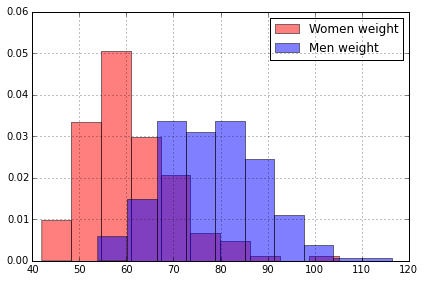

In [77]:
body_women.weight.hist(color='r', label='Women weight',normed=True,alpha=0.5)
body_men.weight.hist(color='b', label='Men weight', normed=True,alpha=0.5)
plt.legend(); plt.tight_layout()

Let's apply log normal distribution to both samples.

In [93]:
shape_w, lognloc_w, lognscale_w = lognorm.fit(body_women.weight.values)
shape_m, lognloc_m, lognscale_m = lognorm.fit(body_men.weight.values)
nloc_w, nscale_w = norm.fit(body_women.weight.values)
nloc_m, nscale_m = norm.fit(body_men.weight.values)

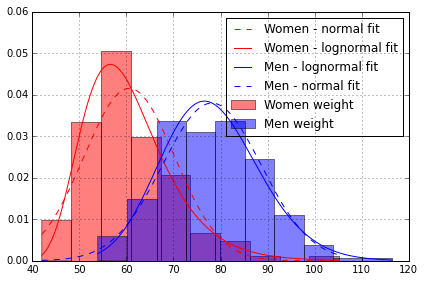

In [96]:
x_w = np.linspace(body_women.weight.values.min(),body_women.weight.values.max(),len(body_women.weight.values))
pdf_log_norm_w = lognorm.pdf(x_w,shape_w,loc=lognloc_w, scale = lognscale_w)
pdf_norm_w = norm.pdf(x_w,loc=nloc_w, scale = nscale_w)
x_m = np.linspace(body_men.weight.values.min(),body_men.weight.values.max(),len(body_men.weight.values))
pdf_log_norm_m = lognorm.pdf(x_m,shape_m, loc=lognloc_m, scale = lognscale_m)
pdf_norm_m = norm.pdf(x_w,loc=nloc_m, scale = nscale_m)
plt.plot(x_w, pdf_norm_w,'r--',label='Women - normal fit')
plt.plot(x_w, pdf_log_norm_w, color='r',label='Women - lognormal fit')
plt.plot(x_m, pdf_log_norm_m, color='b', label='Men - lognormal fit')
plt.plot(x_w, pdf_norm_m,'b--',label='Men - normal fit')
body_women.weight.hist(color='r', label='Women weight',normed=True,alpha=0.5)
body_men.weight.hist(color='b', label='Men weight', normed=True,alpha=0.5)
plt.legend(); plt.tight_layout()


As it can be seen in the figure, lognormal distribution is a better fir to human weight data.

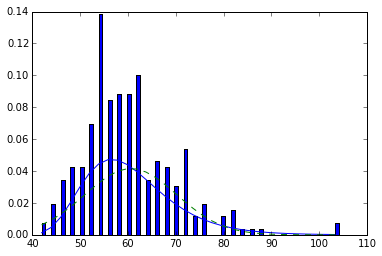

In [208]:
counts_w = body_women.weight.value_counts(normalize=True,bins=32)
x = np.sort(counts_w.keys())
f_obs = counts_w[x]
f_exp_logn = lognorm.pdf(x,shape_w,loc=lognloc_w, scale = lognscale_w)
f_exp_n = norm.pdf(x,loc=nloc_w, scale = nscale_w)
plt.bar(x, f_obs)
plt.plot(x, f_exp_logn)
plt.plot(x, f_exp_n,'--')
                

In [209]:
chisquare(f_obs, f_exp_logn, ddof = 0)

(1.0555091722974541, 1.0)

In [210]:
chisquare(f_obs, f_exp_n, ddof = 0)

(28.215988060678683, 0.60999444796826086)

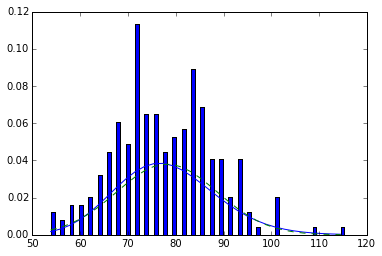

In [213]:
counts_m = body_men.weight.value_counts(normalize=True,bins=32)
x = np.sort(counts_m.keys())
f_obs = counts_m[x]
f_exp_logn = lognorm.pdf(x,shape_m,loc=lognloc_m, scale = lognscale_m)
f_exp_n = norm.pdf(x,loc=nloc_m, scale = nscale_m)
plt.bar(x, f_obs)
plt.plot(x, f_exp_logn)
plt.plot(x, f_exp_n,'--')

In [214]:
chisquare(f_obs, f_exp_logn, ddof = 0)

(0.85502124588029493, 1.0)

In [215]:
chisquare(f_obs, f_exp_n, ddof = 0)

(0.97741336117909594, 1.0)